<a href="https://colab.research.google.com/github/Deb-bee/Deb-bee/blob/main/CONCATENATE_DATAFRAME_TOGETHER_VERTICALLY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

# Create the DataFrame
data = {
    'aid': [152, 152, 152, 154, 154, 154, 154, 154, 155, 155, 155, 155, 155],
    'composer': [
        'J.Hetfield/L.Ulrich', 'K.Hammett', 'J.Hetfield/L.Ulrich', None, None, None, None, None,
        None, None, None, None, None
    ],
    'gid': [3] * 13,
    'mtid': [1] * 13,
    'name': [
        'Battery', 'Master Of Puppets', 'Disposable Heroes', 'Fight Fire With Fire',
        'Ride The Lightning', 'For Whom The Bell Tolls', 'Fade To Black', 'Trapped Under Ice',
        'Frantic', 'St. Anger', 'Some Kind Of Monster', 'Dirty Window', 'Invisible Kid'
    ],
    'tid': [1853, 1854, 1857, 1874, 1875, 1876, 1877, 1878, 1882, 1883, 1884, 1885, 1886],
    'u_price': [0.99] * 13
}

df = pd.DataFrame(data)

# Split the DataFrame into three smaller DataFrames based on album IDs (aid)
tracks_master = df[df['aid'] == 152].reset_index(drop=True)  # Tracks from album 152
tracks_ride = df[df['aid'] == 154].reset_index(drop=True)    # Tracks from album 154
tracks_st = df[df['aid'] == 155].reset_index(drop=True)      # Tracks from album 155

# Concatenate the tracks
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st], sort=True)

# Display the concatenated DataFrame
print(tracks_from_albums)

   aid             composer  gid  mtid                     name   tid  u_price
0  152  J.Hetfield/L.Ulrich    3     1                  Battery  1853     0.99
1  152            K.Hammett    3     1        Master Of Puppets  1854     0.99
2  152  J.Hetfield/L.Ulrich    3     1        Disposable Heroes  1857     0.99
0  154                 None    3     1     Fight Fire With Fire  1874     0.99
1  154                 None    3     1       Ride The Lightning  1875     0.99
2  154                 None    3     1  For Whom The Bell Tolls  1876     0.99
3  154                 None    3     1            Fade To Black  1877     0.99
4  154                 None    3     1        Trapped Under Ice  1878     0.99
0  155                 None    3     1                  Frantic  1882     0.99
1  155                 None    3     1                St. Anger  1883     0.99
2  155                 None    3     1     Some Kind Of Monster  1884     0.99
3  155                 None    3     1             D

In [9]:
# Concatenate the tracks so the index goes from 0 to n-1
tracks_from_albums = pd.concat([tracks_master,tracks_ride,tracks_st],
                               ignore_index=True,
                               sort=True)
print(tracks_from_albums)

    aid             composer  gid  mtid                     name   tid  \
0   152  J.Hetfield/L.Ulrich    3     1                  Battery  1853   
1   152            K.Hammett    3     1        Master Of Puppets  1854   
2   152  J.Hetfield/L.Ulrich    3     1        Disposable Heroes  1857   
3   154                 None    3     1     Fight Fire With Fire  1874   
4   154                 None    3     1       Ride The Lightning  1875   
5   154                 None    3     1  For Whom The Bell Tolls  1876   
6   154                 None    3     1            Fade To Black  1877   
7   154                 None    3     1        Trapped Under Ice  1878   
8   155                 None    3     1                  Frantic  1882   
9   155                 None    3     1                St. Anger  1883   
10  155                 None    3     1     Some Kind Of Monster  1884   
11  155                 None    3     1             Dirty Window  1885   
12  155                 None    3     

In [10]:
# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tracks_master,tracks_ride,tracks_st],
                               join="inner",
                               sort=True)
print(tracks_from_albums)

   aid             composer  gid  mtid                     name   tid  u_price
0  152  J.Hetfield/L.Ulrich    3     1                  Battery  1853     0.99
1  152            K.Hammett    3     1        Master Of Puppets  1854     0.99
2  152  J.Hetfield/L.Ulrich    3     1        Disposable Heroes  1857     0.99
0  154                 None    3     1     Fight Fire With Fire  1874     0.99
1  154                 None    3     1       Ride The Lightning  1875     0.99
2  154                 None    3     1  For Whom The Bell Tolls  1876     0.99
3  154                 None    3     1            Fade To Black  1877     0.99
4  154                 None    3     1        Trapped Under Ice  1878     0.99
0  155                 None    3     1                  Frantic  1882     0.99
1  155                 None    3     1                St. Anger  1883     0.99
2  155                 None    3     1     Some Kind Of Monster  1884     0.99
3  155                 None    3     1             D

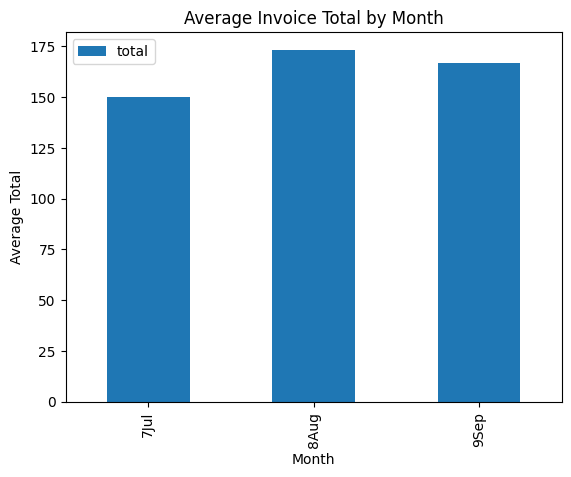

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for inv_jul, inv_aug, and inv_sep
inv_jul = pd.DataFrame({
    'total': [100, 150, 200]  # Example invoice totals for July
})

inv_aug = pd.DataFrame({
    'total': [120, 180, 220]  # Example invoice totals for August
})

inv_sep = pd.DataFrame({
    'total': [130, 160, 210]  # Example invoice totals for September
})

# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep], keys=['7Jul', '8Aug', '9Sep'])

# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({'total': 'mean'})

# Bar plot of avg_inv_by_month
avg_inv_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Total')
plt.title('Average Invoice Total by Month')
plt.show()